# OpenSlide: How to open whole slide images

based on https://www.kaggle.com/code/naotous/openslide-how-to-open-whole-slide-images

In [1]:
import os
import pandas as pd
from glob import glob
from openslide import OpenSlide
from pprint import pprint
import matplotlib.pyplot as plt
import mayo_clinic_strip_ai.openslide as mcsai_openslide

run:

```bash
abcli select
mcsai dataset download metadata
mcsai dataset download other/04414e_0.tif
mcsai dataset download train/006388_0.tif
```

then update `object_name` below:

In [2]:
object_name = "2022-07-12-14-04-28-56027"

In [3]:
data_path = os.path.join(os.getenv("abcli_object_root") , object_name)

In [4]:
train_images = glob(f"{data_path}/other/*")
len(train_images)

1

# Open whole slide images

mcsai.openslide.read_region(/Users/kamangir/storage/abcli/2022-07-12-14-04-28-56027/other/04414e_0.tif): (12656, 29356), 1 level(s), ((12656, 29356),) level dimension(s) - 19.08 MB


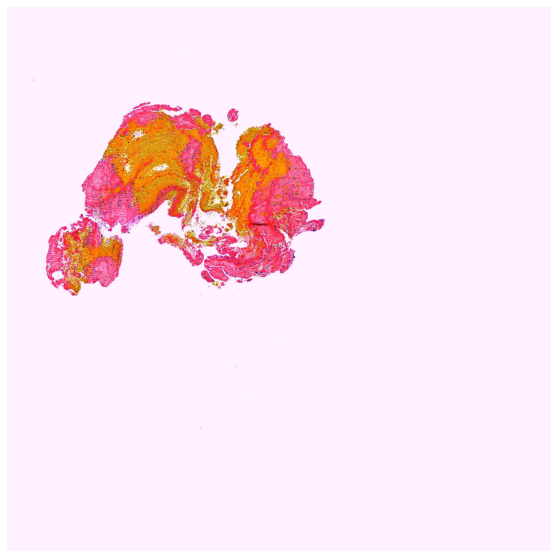

In [5]:
success, image = mcsai_openslide.read_region(
    filename=train_images[0],
    region=(0, 0),
    level=0,
    size=(5000, 5000))

if success:
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [6]:
img_path = train_images[0]

print(img_path)
slide = OpenSlide(img_path)

print(slide.dimensions)
print(slide.level_count)
print(slide.level_dimensions)
pprint(dict(slide.properties))
print(f"file size: {round(os.path.getsize(img_path) / 1024 ** 2, 2)} MB")

/Users/kamangir/storage/abcli/2022-07-12-14-04-28-56027/other/04414e_0.tif
(12656, 29356)
1
((12656, 29356),)
{'openslide.level-count': '1',
 'openslide.level[0].downsample': '1',
 'openslide.level[0].height': '29356',
 'openslide.level[0].tile-height': '128',
 'openslide.level[0].tile-width': '128',
 'openslide.level[0].width': '12656',
 'openslide.vendor': 'generic-tiff',
 'tiff.ResolutionUnit': 'centimeter',
 'tiff.XResolution': '10',
 'tiff.YResolution': '10'}
file size: 19.08 MB


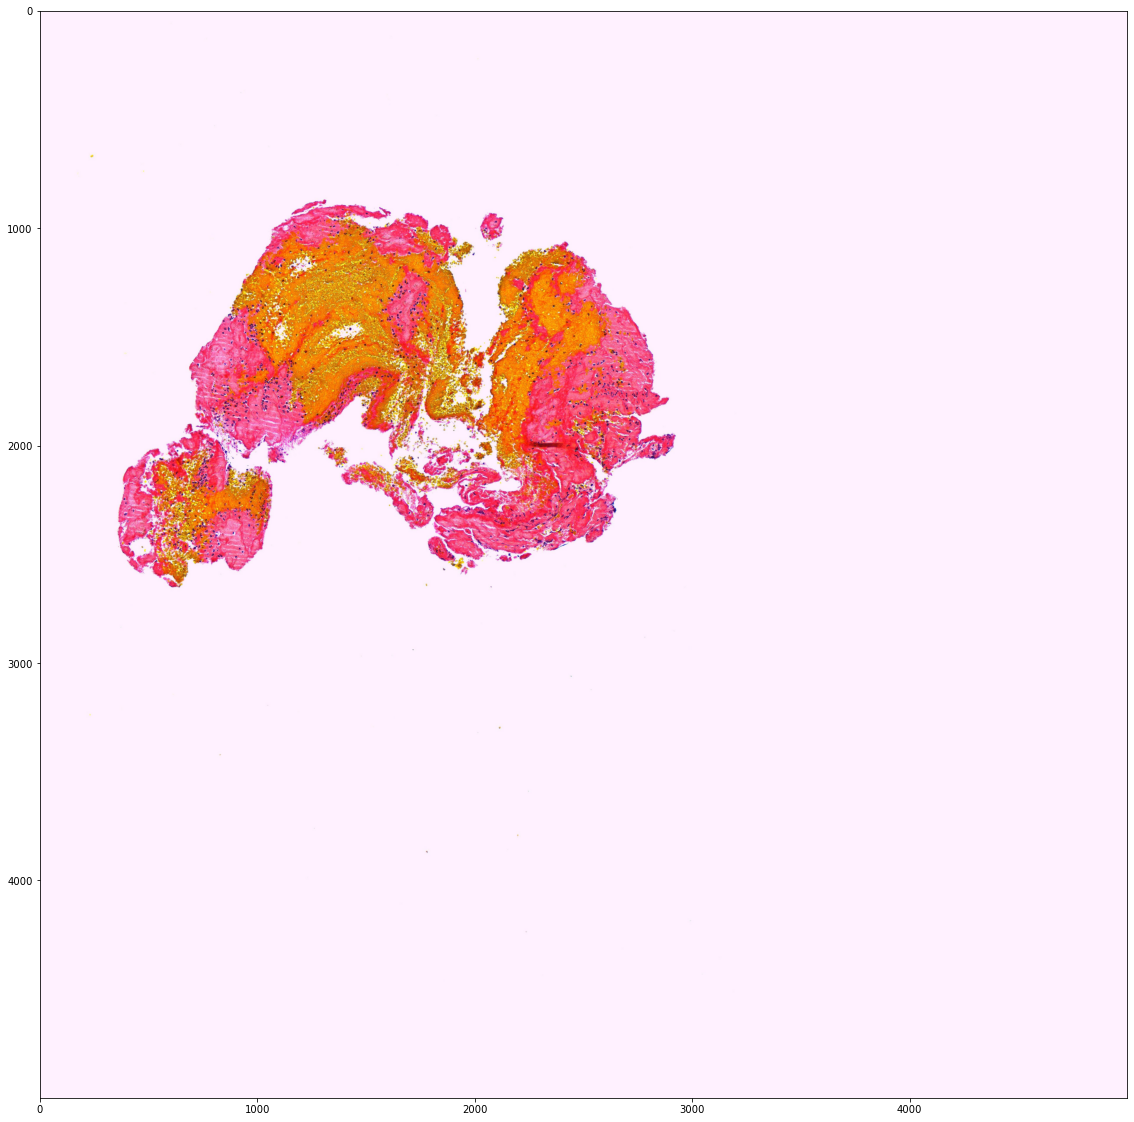

In [7]:
region = (0, 0)
level = 0
size = (5000, 5000)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)

In [8]:
# scale = 1024 / max(slide.dimensions)
# print(f"scale: {scale}")
# print([int(m * scale) for m in slide.dimensions])

# plt.imshow(slide.get_thumbnail([int(m * scale) for m in slide.dimensions]))
#
# Somehow this is very slow

# Train labels

In [9]:
train_df = pd.read_csv(f"{data_path}/train.csv")
train_df

,image_id,center_id,patient_id,image_num,label
0,006388_0,11,006388,0,CE
1,008e5c_0,11,008e5c,0,CE
2,00c058_0,11,00c058,0,LAA
3,01adc5_0,11,01adc5,0,LAA
4,026c97_0,4,026c97,0,CE
...,...,...,...,...,...
749,fe9645_0,3,fe9645,0,CE
750,fe9bec_0,4,fe9bec,0,LAA
751,ff14e0_0,6,ff14e0,0,CE
752,ffec5c_0,7,ffec5c,0,LAA


In [10]:
r = train_df.iloc[0]
r

image_id      006388_0
center_id           11
patient_id      006388
image_num            0
label               CE
Name: 0, dtype: object

In [11]:
img_path = f"{data_path}/train/{r.image_id}.tif"
print(img_path)
slide = OpenSlide(img_path)

print(slide.dimensions)
print(slide.level_count)
print(slide.level_dimensions)
pprint(dict(slide.properties))
print(f"file size: {round(os.path.getsize(img_path) / 1024 ** 2, 2)} MB")

/Users/kamangir/storage/abcli/2022-07-12-14-04-28-56027/train/006388_0.tif
(34007, 60797)
1
((34007, 60797),)
{'openslide.level-count': '1',
 'openslide.level[0].downsample': '1',
 'openslide.level[0].height': '60797',
 'openslide.level[0].tile-height': '128',
 'openslide.level[0].tile-width': '128',
 'openslide.level[0].width': '34007',
 'openslide.vendor': 'generic-tiff',
 'tiff.ResolutionUnit': 'centimeter',
 'tiff.XResolution': '10',
 'tiff.YResolution': '10'}
file size: 1252.11 MB


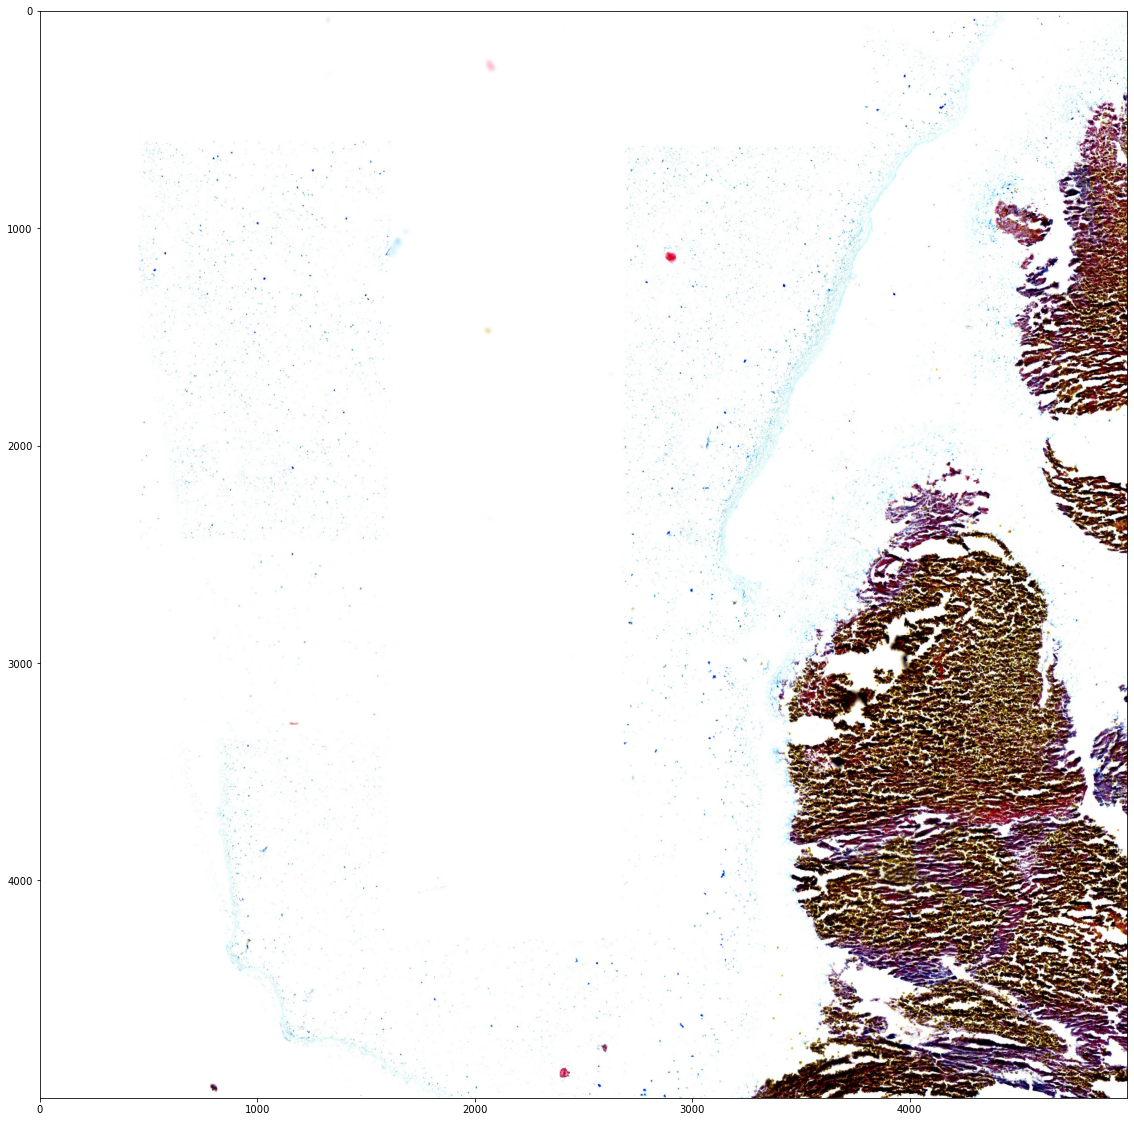

In [12]:
region = (0, 0)
level = 0
size = (5000, 5000)
region = slide.read_region(region, level, size)
plt.figure(figsize=(20, 20))
plt.imshow(region)

END